# Gráficos para dos variables cuantitativas

In [1]:
# Importar paquetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### [1. Diagramas de dispersión](#Cap1)
### [2. Gráfico de líneas](#Cap2)
### [3. Mapas de calor](#Cap3)

## Importar conjunto de datos

In [2]:
df = pd.read_csv("../Datos/Automobile per gallon.csv")  # Importar conjuntos de datos

In [3]:
# Ver las primeras 5 observaciones del conjunto de datos
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 1. Diagramas de dispersión<a class="anchor" id="Cap1"></a>

Los diagramas de dispersón relacionan dos variables cuantitavivas en un gráfico bidimensional. Este diagrama como su nombre lo sugiere permite evaluar que tan dispersas o relacionadas están las observaciones

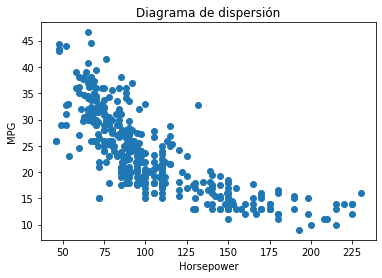

In [4]:
# Diagrama de dispersión básico con matplotlib. Cada punto representa una observación

x = df["horsepower"] # Crear variable X
y = df["mpg"]        # Crear variable y

plt.figure(figsize=(6,4))  # Definir tamaño de la figura
plt.scatter(x,y)           # Crear el diagrama de dispersión
plt.title("Diagrama de dispersión")    # Agregar título a la figura
plt.xlabel("Horsepower")               # Agregar Etiqueta al eje x
plt.ylabel("MPG")                      # Agregar etiqueta al eje y
plt.show()                             # Mostrar diagrama

Los módulos de visualización de Python permiten un alto nivel de personalización de los gráficos para incluir características adicionales, por ejemplo: Modificar color, tamaño de puntos o incluso relacional el tamaño con una tercera variable.

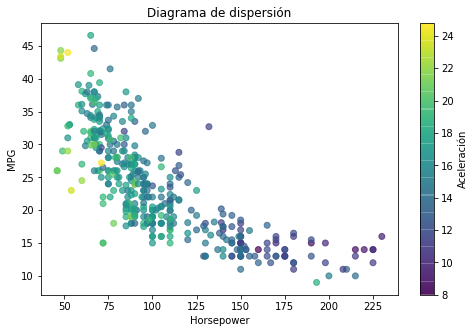

In [5]:
accel = df["acceleration"]    # Se crea una nueva variable diferenciar por colores 

plt.figure(figsize=(8,5))

plt.scatter(x,y, alpha=0.7, c=accel)
plt.colorbar(label="Aceleración")

plt.title("Diagrama de dispersión")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

Incluso sería posible hacer una diferenciación por regiones para el caso puntual de este conjunto de datos, es decir, asignar un color específico considerando una tercera variable ahora de tipo categórica. Para hacer esto sería preciso realizar una codificación de las categorías, lo que es trabajo adicional que facilmente puede ser realizado por Seaborn

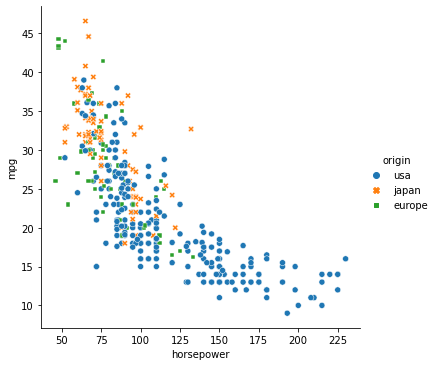

In [6]:
# A diferencia de matplotlib, no se deben especificar de manera explícita las variables a graficar, sino que pueden ser
# tomadas directamente del dataframe

# Los argumentos height/aspect permiten modificar las dimensiones de los gráficos

sns.relplot(x="horsepower", y="mpg", data=df, kind="scatter", hue="origin", style="origin", height=5, aspect=1)
plt.show()

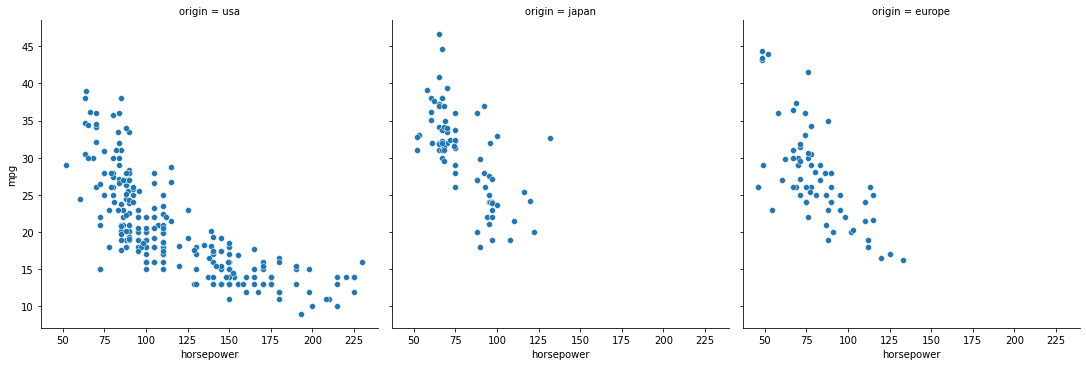

In [7]:
# También es posible trazar de manera directa gráficos diferenciados por región 

sns.relplot(x="horsepower", y="mpg", data=df, col="origin") # Graficos relacionales para dos variables
plt.show()

Los histogramas como se ha visto previamente resultan de utilidad para hacerse a una primera idea sobre la distribución que sigue un determinado conjunto de datos. Desde el paquete de seaborn es posible trazar estos diagramas para cada una da las variables consideradas en in disgrama de dispersión 

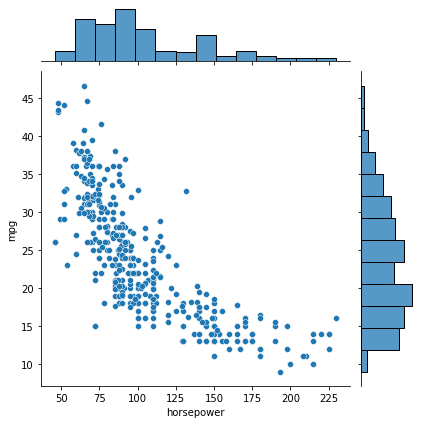

In [8]:
# Visualización conjunta de histogramas y diagramas de dispersión para un par de variable

sns.jointplot(x="horsepower", y="mpg", data=df)
plt.show()

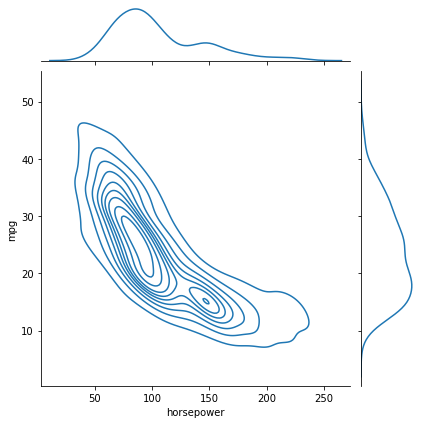

In [9]:
# Adicionalemente, el argumento kind permite representar diferente gráficas adicionales al diagrama
# de dispersión: "reg", "hex", "kde", "resid"

sns.jointplot(x="horsepower", y="mpg", data=df, kind="kde") # kde= kernel density estimate
plt.show()

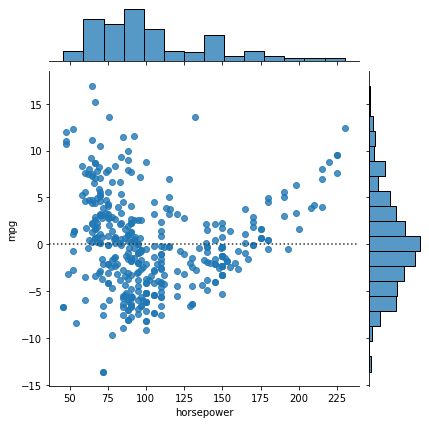

In [10]:
sns.jointplot(x="horsepower", y="mpg", data=df, kind="resid") # Gráfico de residuales mpg como var dependiente
plt.show()

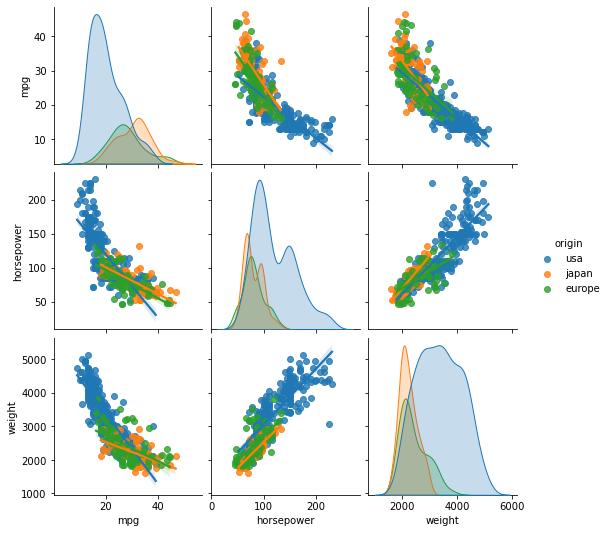

In [11]:
# Igualmente es posible trazar diferentes tipos de datos y agrupados por una determinada columna "variable categórica"

df_2 = df[["mpg", "horsepower", "origin", "weight"]]      # Se filtra un nuevo dataframe para cuatro variables, una categórica
sns.pairplot(data=df_2, hue="origin", kind="reg")
plt.show()

## 2. Gráficos de líneas<a class="anchor" id="Cap2"></a>

Se considera ahora la posibilidad de trazar líneas para la relación de dos variables


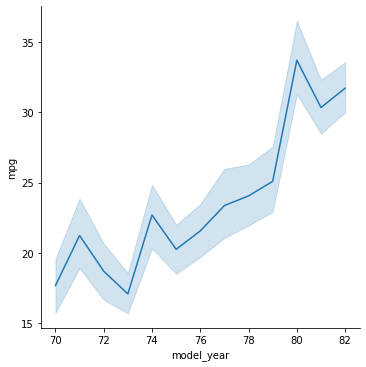

In [12]:
sns.relplot(x="model_year", y="mpg", data=df, kind="line")
plt.show()

# El área sombreada indica el intervalo de confianza para ese año

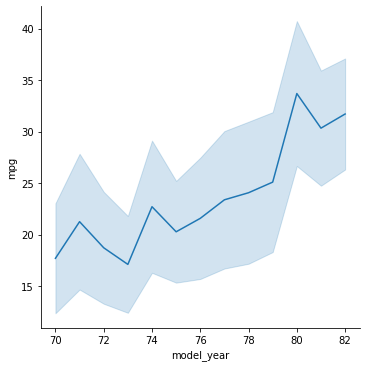

In [13]:
# En lugar del intervalo se puede especificar para que los limites estén dados por las desviaciones estándar

sns.relplot(x="model_year", y="mpg", data=df, kind="line",ci="sd")
plt.show()

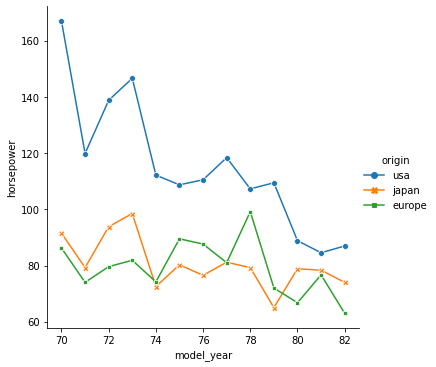

In [14]:
# Al igual que en el diagrama de dispersión, existe la posibilidad de diferenciar las observaciones por categoría, en este caso,
# se toma por el estilo de las líneas

sns.relplot(x="model_year", y="horsepower", data=df, kind="line", style="origin", hue="origin",
            ci=None, dashes=False, markers=True)
plt.show()

## 3. Mapas de calor<a class="anchor" id="Cap3"></a>

Si bien los mapas de calor no son exclusivos para las variables cuantitativas resultan de utilidad para representar: correlaciones o frecuencias entre más de dos variable

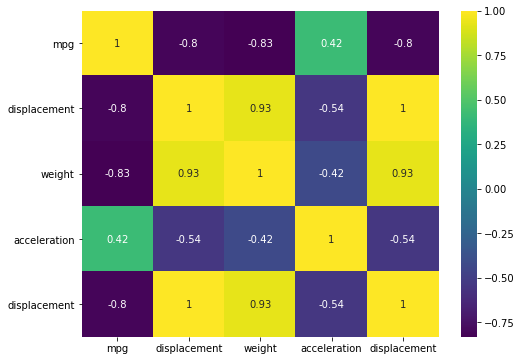

In [15]:
# Los mapas de calor representan la posibilidad de visualizar las correlaciones entre variables, su presentación es similar
# a los histogramas para dos variables continuas 

df_3 = df[["mpg", "displacement", "weight", "acceleration", "displacement"]]     # Se filtra el conjunto de datos original

plt.figure(figsize=(8,6))
corr_matrix = df_3.corr()                                                        # Matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap="viridis")                             # Se construye el mapa
plt.show()

In [ ]:
sns.catplot()